# Carga de datos

In [2]:
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, confusion_matrix
import warnings
from sklearn.exceptions import DataConversionWarning, UndefinedMetricWarning

warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)



# Descargar dataset
wine_quality = fetch_ucirepo(id=186)

# Separar features y target
X = wine_quality.data.features
y = wine_quality.data.targets

# Exploración inicial
print(X.head())
print(y.head())
print(wine_quality.metadata)
print(wine_quality.variables)


   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4  
   quali

# Análisis exploratorio

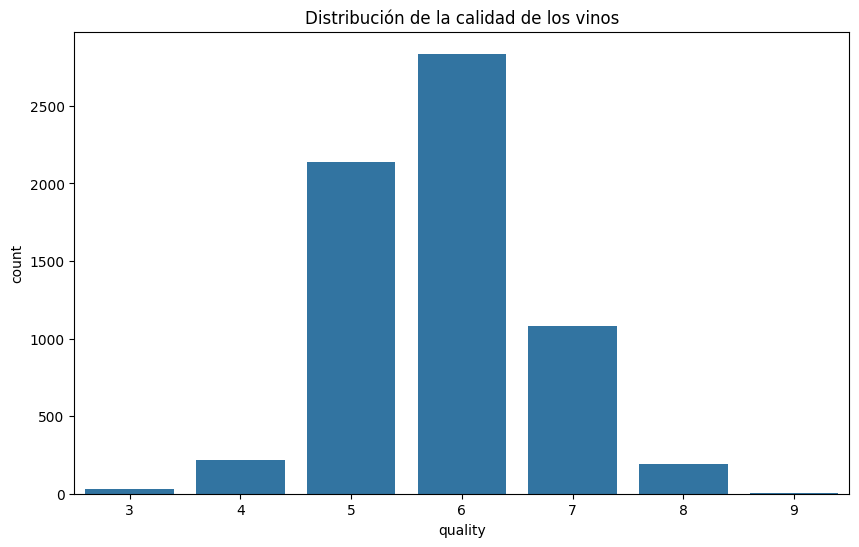

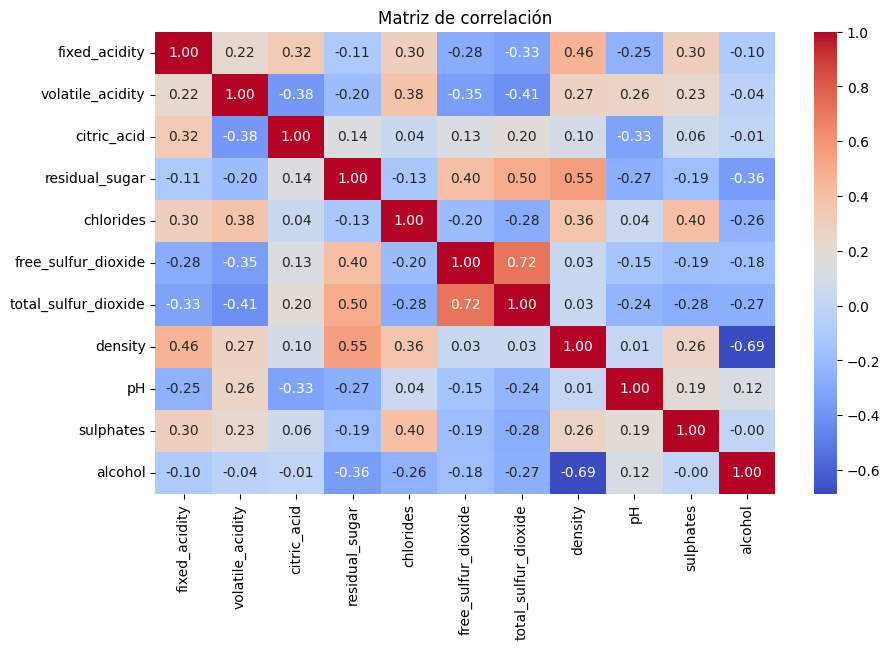

In [3]:
plt.figure(figsize=(10, 6))
sns.countplot(x=y['quality'])
plt.title('Distribución de la calidad de los vinos')
plt.show()

# Matriz de correlación
corr = X.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

Preprocesamiento

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Algoritmos elegidos

##Algoritmos elegidos
Para seleccionar los algoritmos para regresión y para clasificación, se ha hecho una comparativa considerando las características del conjunto de datos,
tales como la naturaleza de las variables (principalmente continuas), el tamaño del dataset, la posible presencia de relaciones no lineales entre las
variables predictoras y la variable objetivo, y el hecho de que la variable objetivo es ordinal y presenta cierto desbalance.

Tras analizar diferentes opciones (KNN, Naive Bayes, SVM y algoritmos basados en árboles) se ha llegado a la conclusión de que los más adecuados son
los basados en árboles. Esto se debe a que:

-Capturan relaciones no lineales y complejas entre las variables de entrada y la variable objetivo.

-Toleran mejor la correlación entre variables y no requieren supuestos como la independencia entre atributos.

-Son robustos ante la presencia de valores atípicos y no requieren un escalado estricto de las variables.

-Permiten interpretar fácilmente los resultados, lo cual es útil para entender qué características químicas del vino tienen mayor peso en la predicción
de la calidad.

-En el caso de la clasificación, los árboles también permiten gestionar de mejor manera el desbalance de clases, especialmente cuando se emplean técnicas
como el muestreo ponderado o el ajuste de la función de costo.

-En la regresión, los árboles de decisión y, especialmente, los bosques aleatorios (Random Forest), suelen ofrecer un buen equilibrio entre precisión y
robustez.

#Explicación sobre por qué otros algoritmos no encajan tan bien
K-Nearest Neighbors (KNN)

KNN es un algoritmo basado en distancias, lo que lo hace sensible al escalado de las variables. Aunque escalamos los datos, en un dataset con variables que representan propiedades químicas tan diversas, algunas relaciones importantes podrían perderse debido a la homogeneización.
KNN no maneja bien relaciones complejas o no lineales entre variables.
Es sensible a datos desbalanceados, lo que puede hacer que las clases mayoritarias dominen la predicción.
Además, KNN es poco eficiente computacionalmente para conjuntos de datos de tamaño medio o grande, ya que requiere calcular la distancia a cada punto en el conjunto de entrenamiento para cada predicción.
Naive Bayes

Naive Bayes parte de un supuesto fuerte de independencia entre variables. En este dataset, las variables químicas suelen presentar correlación significativa entre ellas (como el caso de la acidez fija y la densidad, o el dióxido de azufre libre y el total).
Naive Bayes no captura relaciones no lineales complejas, por lo que es menos adecuado en datasets con relaciones intrincadas entre las características y la calidad.
Es especialmente débil cuando los datos están desbalanceados, ya que tiende a favorecer las clases mayoritarias al calcular las probabilidades.
Support Vector Machines (SVM)

SVM puede ser efectivo en problemas de clasificación y regresión, pero su rendimiento disminuye cuando el número de observaciones es relativamente alto en comparación con el número de variables. En este caso, con cerca de 1600 observaciones (vino blanco) y 11 variables, los modelos basados en árboles suelen ajustarse mejor.
Además, SVM requiere un ajuste cuidadoso de hiperparámetros (como el tipo de kernel y el parámetro C), lo cual incrementa la complejidad computacional.
SVM no es naturalmente interpretable, lo cual es una desventaja en un caso como este, donde entender el efecto de cada variable química es relevante.
También puede verse afectado por datos desbalanceados, aunque se pueden ajustar los pesos de clase.


### Entrenar el modelo de regresión

In [5]:
# Regresión

regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Predicción
y_pred_reg = regressor.predict(X_test)

# Evaluación (regresión)
print("Evaluación - Regresión:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_reg):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_reg):.4f}")
print(f"R2: {r2_score(y_test, y_pred_reg):.4f}")

Evaluación - Regresión:
MAE: 0.4381
MSE: 0.3720
R2: 0.4964


### Entrenar el modelo de clasificación


Evaluación - Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.71      0.12      0.20        43
           5       0.67      0.71      0.69       402
           6       0.65      0.75      0.70       597
           7       0.70      0.55      0.62       215
           8       0.92      0.33      0.49        36
           9       0.00      0.00      0.00         1

    accuracy                           0.67      1300
   macro avg       0.52      0.35      0.38      1300
weighted avg       0.67      0.67      0.66      1300



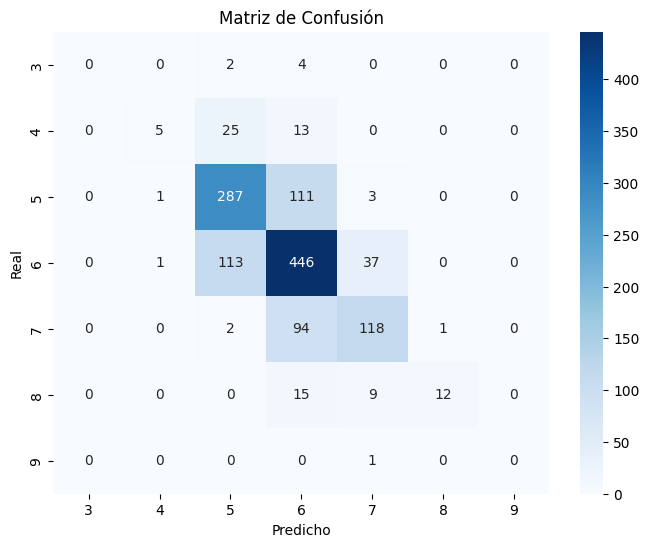

In [6]:
# Convertir y_train e y_test a formato adecuado para clasificación
y_train_class = y_train.values.ravel()
y_test_class = y_test.values.ravel()

# Clasificación
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train_class)

# Predicción
y_pred_class = classifier.predict(X_test)

# Evaluación (clasificación)
print("\nEvaluación - Clasificación:")
print(classification_report(y_test_class, y_pred_class))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=np.sort(y['quality'].unique()),
            yticklabels=np.sort(y['quality'].unique()))
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# Prueba con otros algoritmos (SVM)

### SVR(Regresión)

In [ ]:
from sklearn.svm import SVR


#Escalar los datos para SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Modelo SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train_scaled, y_train)

#Predicción
y_pred_reg = regressor.predict(X_test_scaled)

#Evaluación
print(" Evaluación - Regresión:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_reg):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_reg):.4f}")
print(f"R2: {r2_score(y_test, y_pred_reg):.4f}")

 Evaluación - Regresión:
MAE: 0.5126
MSE: 0.4599
R2: 0.3773


### SVC(Clasificación)


 Evaluación - Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        43
           5       0.58      0.65      0.61       402
           6       0.55      0.71      0.62       597
           7       0.61      0.20      0.30       215
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00         1

    accuracy                           0.56      1300
   macro avg       0.25      0.22      0.22      1300
weighted avg       0.53      0.56      0.52      1300



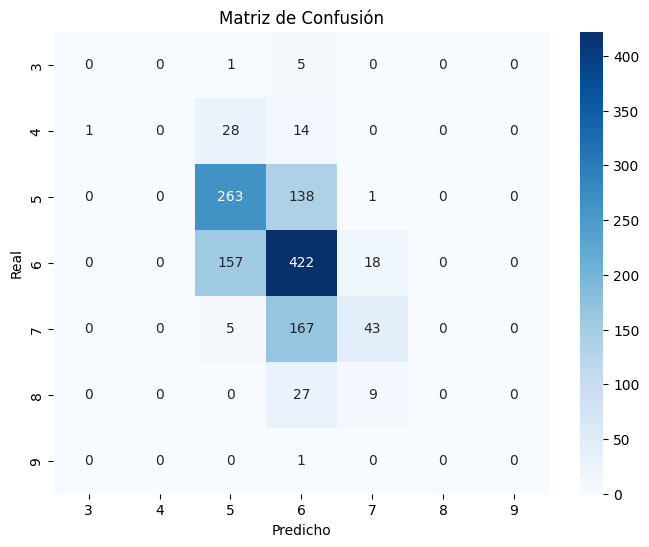

In [ ]:
from sklearn.svm import SVC


#Escalar los datos para SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Convertir y_train e y_test al formato adecuado
y_train_class = y_train.values.ravel()
y_test_class = y_test.values.ravel()

#Modelo SVC
classifier = SVC(kernel='rbf', probability=True)  # Puedes probar con 'linear' o 'poly'
classifier.fit(X_train_scaled, y_train_class)

#Predicción
y_pred_class = classifier.predict(X_test_scaled)

#Evaluación
print("\n Evaluación - Clasificación:")
print(classification_report(y_test_class, y_pred_class))

#Matriz de confusión
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=np.sort(np.unique(y_train_class)),
            yticklabels=np.sort(np.unique(y_train_class)))
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

## Comparación

### Comparación de Regresión
Modelo |	MAE |	MSE |	R²

Random Forest |	0.4381 |	0.3720 |	0.4964

SVM	| 0.5126 |	0.4599 |	0.3773
### Conclusión:

Random Forest supera a SVM en regresión, ya que tiene menor MAE y MSE y mayor R².
SVM tiene un peor desempeño en comparación con Random Forest, ya que su error es mayor (MAE y MSE más altos) y su R² es más bajo (indica que explica menos la variabilidad de los datos).

### Comparación de Clasificación
Modelo	| Accuracy | 	Macro Avg F1-score | 	Weighted Avg F1-score

Random Forest |	0.67 |	0.38 |	0.66

SVM	| 0.56 |	0.22 |	0.52
### Conclusión:

Random Forest es claramente mejor que SVM para clasificación, con una mejor accuracy (67% vs. 56%).
El F1-score de Random Forest también es más alto en macro avg (0.38 vs. 0.22) y weighted avg (0.66 vs. 0.52), lo que indica que maneja mejor el balance entre precisión y recall.
SVM tiene un desempeño bajo, especialmente en clases minoritarias como 3, 4, 8 y 9, donde no logra predecir correctamente ningún caso.

# Comparación entre regresión y clasificación

Para la comparación entre la regresión y la clasificación hay que adaptar los resultados de la clasificación a la regresión por ejemplo. Para ello calcularemos la MAE en base a los resultados obtenidos.


In [9]:
from sklearn.metrics import mean_absolute_error

# Obtener las clases reales ordenadas
clases_reales = np.sort(np.unique(y_train_class))

# Convertir probabilidades en valores continuos con las clases reales
y_pred_continuous = np.sum(y_prob_class * clases_reales, axis=1)

# Calcular MAE en clasificación
mae_class = mean_absolute_error(y_test_class, y_pred_continuous)

print(f"\n MAE (Clasificación): {mae_class:.4f}")


📌 MAE (Clasificación): 0.4306


Podemos observar que la MAE en regresión es 0,4381 y que en clasificación es 0,4306 por lo que la regresión al tener un valor algo menor hace ver que también es un poco mejor.